In [1]:
from google.colab import files
uploaded = files.upload()

Saving births.csv to births.csv
Saving passengers.csv to passengers.csv


In [2]:
import pandas as pd
import numpy as np

In [4]:
passangers = pd.read_csv('passengers.csv', sep=',')

In [5]:
passangers

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [6]:
passangers.set_index('Month', inplace=True)

In [9]:
passangers.head()

#Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [12]:
passangers.index = pd.to_datetime(passangers.index)

Так можно спарсить индекс к виду даты

In [23]:
passengers = pd.read_csv('passengers.csv', index_col='Month', parse_dates = True)

In [ ]:
passeng.sort_index()

In [26]:
index = passengers.sort_index().index

In [38]:
passengers.columns = ['pass']

Так можно аггрегировать, по сгрупированным данным

In [53]:
agg_tab = passengers.resample('Y').agg({'pass' : ['sum', 'max', 'mean']})

In [56]:
agg_tab.head(2)

pass                 
             sum  max        mean
Month                            
1949-12-31  1520  148  126.666667
1950-12-31  1676  170  139.666667

In [60]:
passengers.head(7)

pass
Month           
1949-01-01   112
1949-02-01   118
1949-03-01   132
1949-04-01   129
1949-05-01   121
1949-06-01   135
1949-07-01   148

In [61]:
passengers.shift(2, axis=0).head(7)

pass
Month            
1949-01-01    NaN
1949-02-01    NaN
1949-03-01  112.0
1949-04-01  118.0
1949-05-01  132.0
1949-06-01  129.0
1949-07-01  121.0

Скользящее среднее

In [62]:
passengers.rolling(window=3)

Rolling [window=3,center=False,axis=0]

In [85]:
df = pd.DataFrame({'B': [0, 1, 2, 8, 5, 3, 4]})

In [89]:
df.rolling(3, win_type='triang').sum()

B
0   NaN
1   NaN
2   2.0
3   6.5
4  11.5
5  10.5
6   7.5

In [90]:
df = pd.DataFrame({'a':np.arange(10, 17)})

In [99]:
df.iloc[1] = np.nan

In [100]:
df

a
0  10.0
1   NaN
2  12.0
3  13.0
4  14.0
5  15.0
6  16.0

In [102]:
df['a'].rolling(3, min_periods=1).median()

0    10.0
1    10.0
2    11.0
3    12.5
4    13.0
5    14.0
6    15.0
Name: a, dtype: float64

In [109]:
passengers.replace('Y')

pass    622
dtype: int64

In [112]:
passengers.resample('2Y').agg({'pass': ['mean', 'max']})

pass     
                  mean  max
Month                      
1949-12-31  126.666667  148
1951-12-31  154.916667  199
1953-12-31  211.000000  272
1955-12-31  261.458333  364
1957-12-31  348.333333  467
1959-12-31  404.666667  559
1961-12-31  476.166667  622

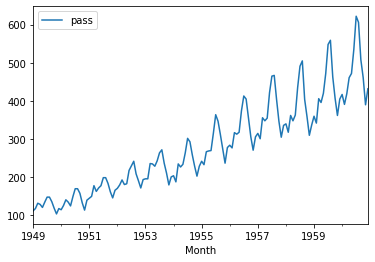

In [113]:
passengers.plot()

In [115]:
pass1 = passengers.resample('Y').mean()

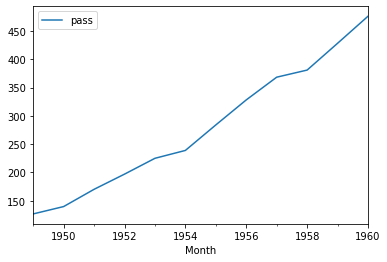

In [117]:
pass1.plot()

In [118]:
import matplotlib.pyplot as plt

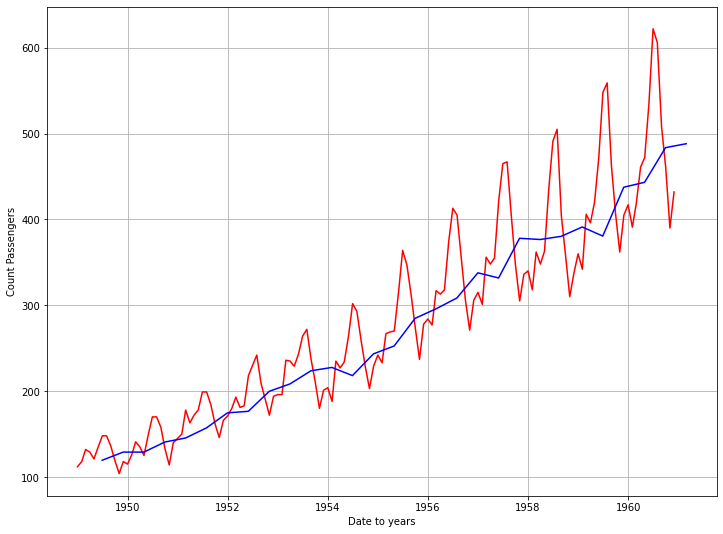

In [187]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(passengers, color='red')
ax.plot(passengers.resample('5M').mean().rolling(2).mean(), color='blue')
ax.set_xlabel('Date to years')
ax.set_ylabel('Count Passengers')
ax.grid(True)

In [191]:
births = pd.read_csv('births.csv', index_col='Date', parse_dates = True)

In [ ]:
births.head(2)

In [ ]:
births.info()

In [195]:
births

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]

In [201]:
births1 = births.sort_index().index

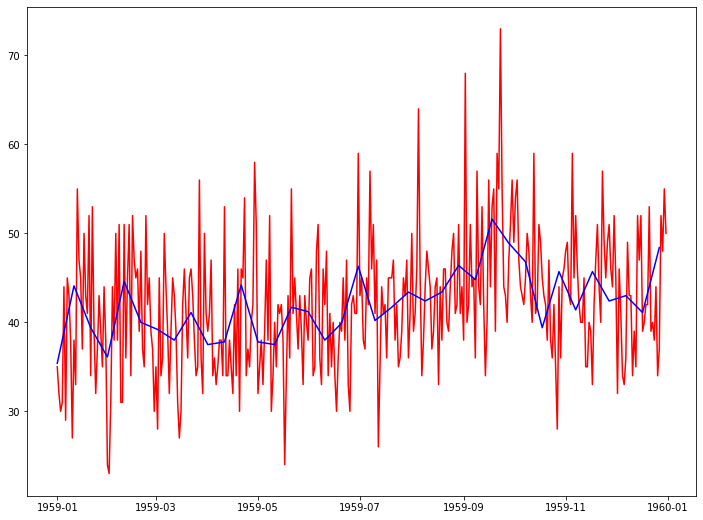

In [211]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(births, color='r')
ax.plot(births.resample('10D').mean(), color='blue')

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [240]:
decompose = seasonal_decompose(passengers)

In [230]:
decompose = seasonal_decompose(births, model='additive')

In [ ]:
decompose.resid

In [235]:
decompose_births = seasonal_decompose(births, model='additive')

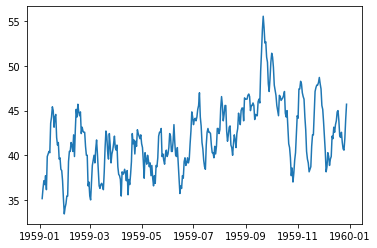

In [238]:
plt.plot(decompose_births.trend)

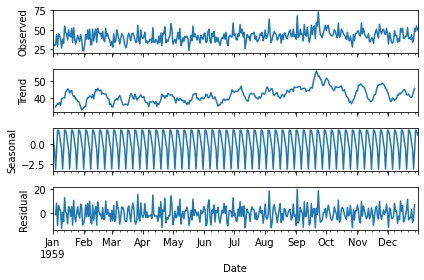

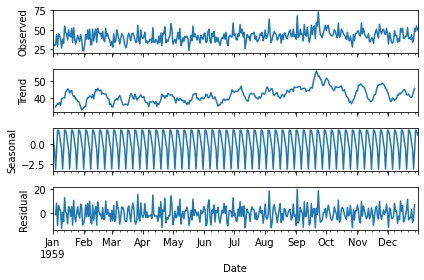

In [239]:
decompose_births.plot()

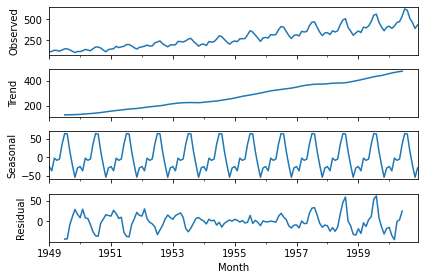

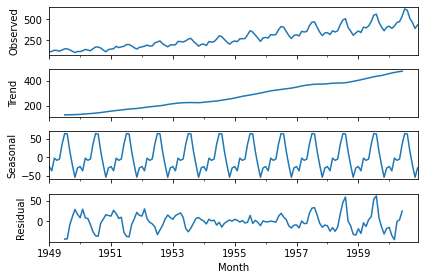

In [241]:
decompose.plot()

Для проверки стат гипотезы, что ряд стационарен используем:

In [242]:
from statsmodels.tsa.stattools import adfuller

In [243]:
passengers.head()

pass
Month           
1949-01-01   112
1949-02-01   118
1949-03-01   132
1949-04-01   129
1949-05-01   121

In [244]:
adf_test = adfuller(passengers['pass'])

In [245]:
adf_test

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [248]:
births

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]

In [249]:
adfuller(births['Births'])

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '10%': -2.5710891239349585,
  '5%': -2.8696473721448728},
 2343.82909264642)